In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (t, norm, f)

# ___Hypothesis Testing in Python___
-----------------

## ___Population Proportion___
--------------------
--------------------

In [3]:
# Question:

# In previous years, 52% of the parents believed electronic medfia was responsible for their teenagers' lack of sleep. Do more parents today believe 
# that their tenagers' lack of sleep is due to electronic devices?

In [4]:
# Data:

# Population -> parents with teenaage children.
# Parameter of interest -> proportion of parents with a teenager who believe that electronic devices are responsible for ctheir children's lack
# of sleep.
# Null hypotheis -> P_today = 0.52 or P_past - P_today = 0
# Alternative hypothesis -> P_past - P_today != 0

# Sample size = 1018 parents with teenage children.
# A new study found that now 56% of parents believe the above to be the case.

In [5]:
ssize = 1018
prev_prop, current_prop = 0.52, 0.56

In [6]:
# test statistic = (best estimate - hypothesized estimate) / estimated standard error

best_est = current_prop - prev_prop
best_est

0.040000000000000036

In [7]:
# standard error of the null proportion
# sqrt{P x (1 - P) / N}, P according to the Null hypothesis is 0.52 because it states delta P = 0.

stderr_null = np.sqrt(prev_prop * (1 - prev_prop) / ssize)
stderr_null

0.015658436718635507

In [8]:
# z value

zstat = (best_est - 0) / stderr_null
zstat

2.5545334262132955

In [8]:
# Since our test was two tailed, (directionless), the only thing that matters is the distance from t = 0 to be greater than the t score.
# i.e we need to consider the area on either sides of the t = 0 line.

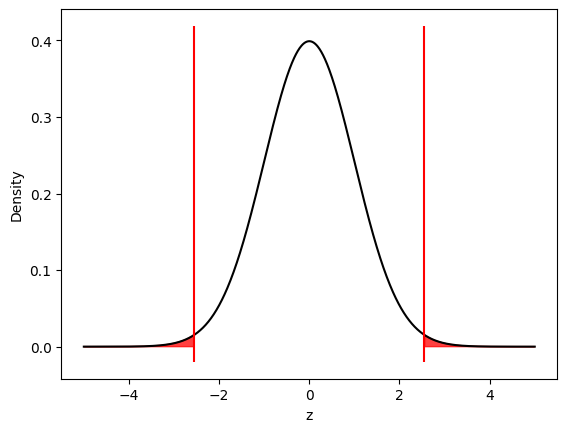

In [13]:
x = np.linspace(start = -5, stop = 5, num = 1000, endpoint = True)
zpdfs = norm.pdf(x)

fig, axes = plt.subplots()
axes.plot(x, zpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-zstat, zstat], ymax = ymax, ymin = ymin, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = zpdfs, where = (x <= -zstat) | (x >= zstat), color = "red", alpha = 0.75)
axes.set_ylabel("Density")
axes.set_xlabel("z")
plt.show()

In [16]:
# p value

p = 2 * (1 - norm.cdf(zstat))
p

0.010633021983644797

In [17]:
p < 0.05

True

In [12]:
# Since p value is less than the confidnece levele, we can reject the NUll hypothesis.
# So, there's enough evidence to claim that the proportions parents with teenagers who believe the reason for their children not getting enough
# sleep is electronic devices now is different from then.

## ___Differences in Population Proportion___
--------------------
--------------------

In [13]:
# Question: Is there a difference in the population proportions of the parents of white and hispanic children who reported 
# that their child had a swimming lesson?

# Population -> Parents of white children (age 10 - 18) and parents of hispanic children (age 10 -18)
# Parameter of interest -> proportion of parents who reported that their child had a swimming lesson.

In [20]:
# Hypotheses:

# Null hypothesis: There's no significant difference between the proportion of white and hispanic parents who reported that their child had swimming
# lessons.

# Alternative hypothesis: There's a significant difference between the proportion of white and hispanic parents who reported that their child had
# swimming lessons.

# Data

ssize_w, ssize_h = 247, 308
prop_w, prop_h = 0.368, 0.389

In [21]:
# Best estimate, the difference in the sample proportions.

best_est = prop_h - prop_w
best_est

0.02100000000000002

In [22]:
# estimated standard error

# Since we do not have the samples here, we need to use the combined proportion to calculate the combined standard error

stderr_null_w = np.sqrt((prop_w * (1 - prop_w)) / ssize_w)
stderr_null_h = np.sqrt((prop_h * (1 - prop_h)) / ssize_h)

stderr_null_comb = stderr_null_h + stderr_null_w
stderr_null_comb

0.05846477425784153

In [23]:
# test statictic

zstat = (best_est - 0) / stderr_null_comb
zstat

0.3591906454198515

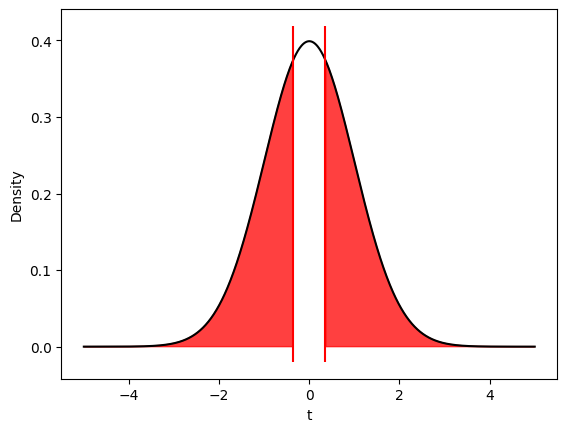

In [24]:
x = np.linspace(start = -5, stop = 5, num = 1000, endpoint = True)
zpdfs = norm.pdf(x)

fig, axes = plt.subplots()
axes.plot(x, zpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-zstat, zstat], ymax = ymax, ymin = ymin, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = zpdfs, where = (x <= -zstat) | (x >= zstat), color = "red", alpha = 0.75)
axes.set_ylabel("Density")
axes.set_xlabel("t")
plt.show()

In [27]:
# two tailed z test, so...

p = 2 * (1 - norm.cdf(zstat))
p

0.7194524742040405

In [28]:
p < 0.05

False

In [21]:
# The p value is way larger than our significance level of 0.05, so we cannot reject the NULL hypothesis.
# There's enough evidence to assert that the population proportions of white and hispanic parents who claimed that their 
# child has had swimming lessons are equal.

## ___Population Mean___
-----------------
-----------------

In [22]:
# Question: 

# Is the average cartwheel distance is more than 80 inches for adults?

# Hypotheses:

# Null hypothesis: The average cartwheel distance for adults is 80 inches.
# Alternative hypothesis: The average cartwheel distance for adults is not equal to 80 inches. (two tailed)

In [23]:
cartwheel = pd.read_csv("../data/Cartwheeldata.csv")
cwdist = cartwheel.CWDistance

smean = cwdist.mean()
ssize = cwdist.size

smean, ssize

(82.48, 25)

In [24]:
cartwheel.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.400000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.533114
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,2.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000


In [25]:
# best estimate is the sample mean
# hypothesized estimate is 80 inches.

smean

82.48

In [26]:
# estimated standard error,

stderr_null = cwdist.std() / np.sqrt(ssize)
stderr_null

3.0117104774529704

In [27]:
# test statistic, two tailed

tstat = (smean - 80) / stderr_null
tstat

0.8234523266982029

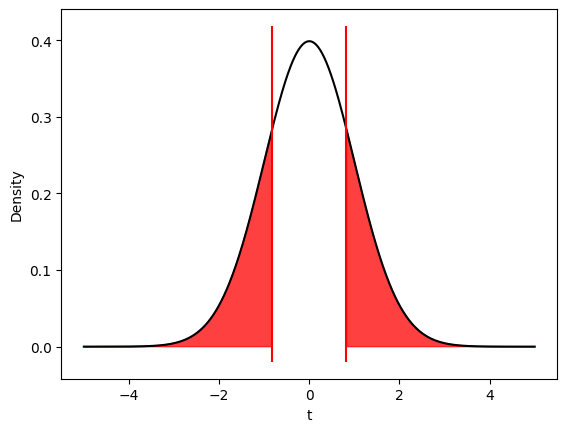

In [28]:
x = np.linspace(start = -5, stop = 5, num = 1000, endpoint = True)
tpdfs = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-tstat, tstat], ymax = ymax, ymin = ymin, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = tpdfs, where = (x <= -abs(tstat)) | (x >= abs(tstat)), color = "red", alpha = 0.75)
axes.set_ylabel("Density")
axes.set_xlabel("t")
plt.show()

In [29]:
# p value

p = 2 * (1 - t.cdf(abs(tstat), df = ssize - 1))
p

0.4183586657067706

In [30]:
# Our p value is larger than our significance level of 0.05, so
# We cannot reject the Null hypothesis.
# There's enough evidence to claim that the population mean of cartwheel distances is indeed 80 inches.

## ___Difference in Population Means___
-----------------
-----------------

In [31]:
# Question:

# Considering Americans, is there a significant difference in the BMIs of men and women?
# using NHANES data,

# RIAGENDR: 1 - M, 2 - F
nhanes = pd.read_csv("../data/nhanes_2015_2016.csv", usecols = ["RIAGENDR", "BMXBMI"]).dropna(axis = 0)

In [32]:
nhanes.isna().sum(axis = 0)

RIAGENDR    0
BMXBMI      0
dtype: int64

In [33]:
nhanes.RIAGENDR.unique()

array([1, 2], dtype=int64)

In [34]:
males = nhanes.BMXBMI[nhanes.RIAGENDR == 1]
females = nhanes.BMXBMI[nhanes.RIAGENDR == 2]

In [35]:
# sample means of BMI

smean_m = males.mean()
smean_f = females.mean()

smean_m, smean_f

(28.778072111846942, 29.93994565217391)

In [36]:
# Null hypothesis: There's no significant difference between the BMIs of males and females.
# i.e H0: BMI_f - BMI_m = 0

# Alternative hypothesis: There's a significant difference between the BMIs of males and females.
# i.e H1: BMI_f - BMI_m != 0

In [37]:
# best estimate, is the difference between sample means,

best_est = smean_f - smean_m
best_est

1.1618735403269689

In [39]:
# pooled approach will not work!

males.var(), females.var()

(39.094601802674305, 60.113952562454756)

In [106]:
# estimated standard errors, unpooled approach.

stderr_m = males.std() / np.sqrt(males.size)
stderr_f = females.std() / np.sqrt(females.size)

stderr_comb = stderr_f + stderr_m
stderr_comb

0.26282717342129075

In [108]:
# test statistic, two tailed

tstat = (best_est - 0) / stderr_comb
tstat

4.4206750968804105

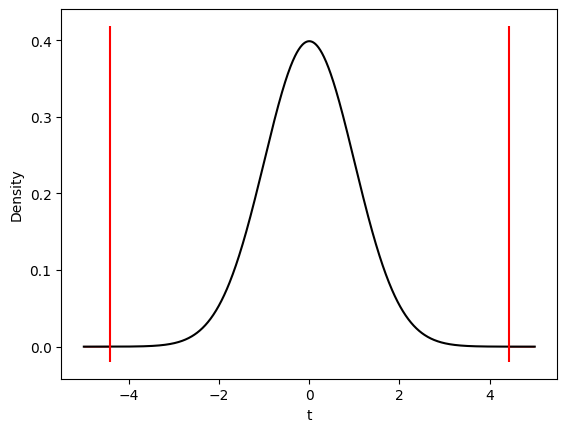

In [110]:
x = np.linspace(start = -5, stop = 5, num = 1000, endpoint = True)
tpdfs = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tpdfs, color = "black")
ymin, ymax = axes.get_ybound()
axes.vlines([-tstat, tstat], ymax = ymax, ymin = ymin, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = tpdfs, where = (x <= -abs(tstat)) | (x >= abs(tstat)), color = "red", alpha = 0.75)
axes.set_ylabel("Density")
axes.set_xlabel("t")
plt.show()

In [111]:
males.size, females.size

(2718, 2944)

In [114]:
p = 2 * (1 - t.cdf(tstat, df = 2718 - 1))
p

1.022541256179288e-05

In [115]:
# p value is way smaller than the alpha (significance level) value of 0.05
# So, we can reject the Null hypothesis.

# There's enough evidence to assert that the population means of BMIs for mnales and females are not equal.